<p align = 'center'><img width=100 src='google-gemini-icon.png'></p>
<h1 align = 'center'>Gemini Pro Demonstration</h1>

> **Note** <br>
The Python SDK  for the Gemini API is contained in the `google-generativeai` package. It is needed to install this dependency using **pip**.

In [ ]:
!pip install -q U google-generativeai --quiet

#  Libraries Import

In [ ]:
import google.generativeai as genai
import PIL.Image
import pathlib
import textwrap

from IPython.display import display
from IPython.display import Markdown

from google.colab import userdata
from google.generativeai.types import HarmCategory, HarmBlockThreshold

In [ ]:
def transform_to_markdown(text):
  text = text.replace('•', '*')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

input_text = 'This is a • sample text with bullet points.'
result = transform_to_markdown(input_text)
display(result)

> This is a * sample text with bullet points.

# API Key Setup

Before use the Gemini API, you must need to get your API Key. If yo don't have it yet, you can obtain one [here](https://ai.google.dev/).

In [ ]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

In [ ]:
genai.configure(api_key=GOOGLE_API_KEY)

# Gemini Models Check

In [ ]:
for model in genai.list_models():
  print(model)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representatio

In [ ]:
for model in genai.list_models():
  if 'generateContent' in model.supported_generation_methods:
    print(model.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


# Generate text from text inputs

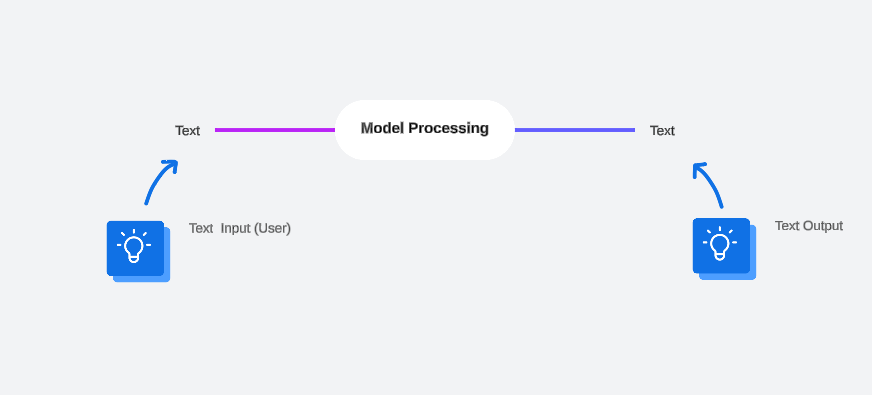

In [ ]:
model = genai.GenerativeModel('gemini-pro')
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
)

In [ ]:
%%time
response = model.generate_content('Who was Sidarta Gautama ?')

CPU times: user 60.3 ms, sys: 8.42 ms, total: 68.7 ms
Wall time: 3.33 s


In [ ]:
transform_to_markdown(response.text)

> Siddhartha Gautama, also known as the Buddha, was the founder of Buddhism. He was born in Lumbini, Nepal, around 563 BCE. He was the son of a wealthy king and lived a life of luxury. However, at the age of 29, he left his home and family to seek enlightenment. After six years of searching, he attained enlightenment under a bodhi tree. He then spent the rest of his life teaching others how to attain enlightenment. He died in Kushinagara, India, at the age of 80.

In [ ]:
%%time
# Getting the content in real time
response = model.generate_content('What is the meaning of life ?', stream = True)

for chunk in response:
  print(chunk.text)
  print("_" * 80)
  print('\n')

**The meaning of life is a subjective and multifaceted concept that has been pondered by
________________________________________________________________________________


 philosophers, theologians, and individuals throughout history.** There is no universally accepted answer, and the meaning of life can vary depending on one's personal beliefs, values
________________________________________________________________________________


, and experiences. Here are some common perspectives on the meaning of life:

**1. Purposeful Existence:** Some believe that life has an inherent purpose or goal, whether it is fulfilling a destiny, achieving personal goals, or contributing to society. This perspective often involves a sense of direction and a belief in the significance
________________________________________________________________________________


 of one's actions.

**2. Happiness and Fulfillment:** Others prioritize maximizing happiness and personal fulfillment as the meaning of lif

# Generate text from image and text inputs

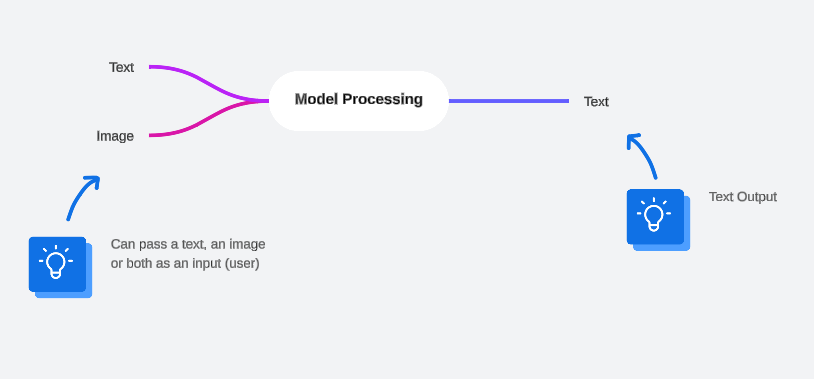

Gemini provides a multimodal model `gemini-pro-vision` that accepts both text and images inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')
model

genai.GenerativeModel(
    model_name='models/gemini-pro-vision',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
)

In [ ]:
!curl -o image.jpg https://static.scientificamerican.com/sciam/cache/file/07C83C00-258E-4BE0-B702FD8EF0F26870_source.jpg?w=600

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23570  100 23570    0     0   121k      0 --:--:-- --:--:-- --:--:--  121k


In [ ]:
!curl -o image2.jpg https://erepublic.brightspotcdn.com/dims4/default/e0c0b96/2147483647/strip/true/crop/2800x1460+0+162/resize/840x438!/quality/90/?url=http%3A%2F%2Ferepublic-brightspot.s3.us-west-2.amazonaws.com%2F4c%2Ff7%2F16181df64dbb94a59cf768b1bda3%2Fcellphones.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  115k  100  115k    0     0   367k      0 --:--:-- --:--:-- --:--:--  367k


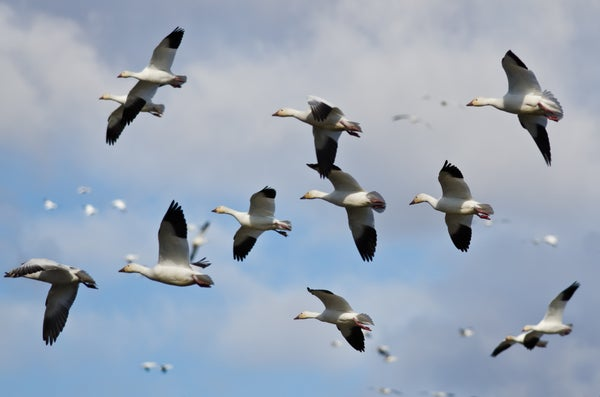

In [ ]:
img = PIL.Image.open('image.jpg')
img

In [ ]:
%%time
response = model.generate_content(img)

CPU times: user 94.7 ms, sys: 16.4 ms, total: 111 ms
Wall time: 6.54 s


In [ ]:
transform_to_markdown(response.text)

>  A flock of geese flying in a V-formation.

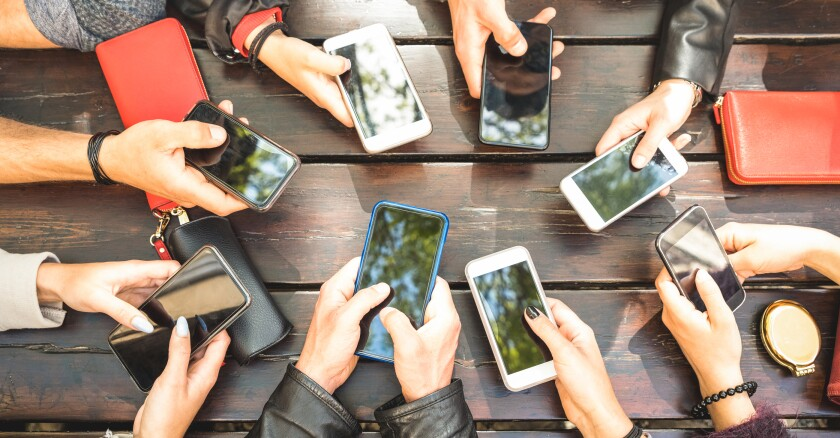

In [ ]:
img2 = PIL.Image.open('image2.jpg')
img2

In [ ]:
%%time
response = model.generate_content(['Write a text about the bad habits of using cellphone for much time', img2], stream = True)

CPU times: user 175 ms, sys: 24.5 ms, total: 200 ms
Wall time: 12.9 s


In [ ]:
response.resolve()

In [ ]:
transform_to_markdown(response.text)

>  Cellphones have become an essential part of our lives. They allow us to stay connected with friends and family, access information, and get work done. However, using cellphones for too much time can have negative consequences.
> 
> One of the biggest problems with using cellphones for too long is that it can lead to addiction. People who are addicted to their cellphones may find it difficult to control their usage, and they may experience anxiety or depression when they are not using their phones.
> 
> Another problem with using cellphones for too long is that it can lead to health problems. For example, people who use their cellphones for long periods of time may experience neck pain, back pain, and eye strain. Additionally, using cellphones in bed can disrupt sleep.
> 
> Finally, using cellphones for too long can lead to social problems. People who spend a lot of time on their phones may find it difficult to interact with others in person. They may also become less aware of their surroundings and may be more likely to experience accidents.
> 
> If you are concerned about your cellphone usage, there are a few things you can do to reduce your screen time. First, try to set limits on how much time you spend on your phone each day. Second, try to avoid using your phone in bed. Third, try to find other activities to do instead of using your phone, such as spending time with friends and family, reading, or exercising.
> 
> If you are struggling to reduce your cellphone usage on your own, you may want to consider seeking professional help. A therapist can help you identify the underlying causes of your addiction and develop strategies for overcoming it.

# Generation Configuration

The `generation_config` argument allows you to modify the generation parameters. Every prompt that's send to the model includes parameters values that control how the model generates responses.

In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
%%time
transform_to_markdown(model.generate_content('Tell me about the history of BMW').text)

CPU times: user 174 ms, sys: 17.5 ms, total: 191 ms
Wall time: 13.2 s


> **BMW Historie:**
> 
> **Early Beginnings (1913-1918):**
> 
> * March 7, 1913: Gustav Otto and Karl Rapp establish the "Rapp Motorenwerke GmbH" in Munich to produce aircraft engines.
> * 1914: Renamed to "Bayerische Flugzeugwerke AG" (BFW) following the outbreak of World War I.
> 
> **Post-War Evolution (1918-1923):**
> 
> * 1918: With the end of the war, BFW faces a downturn in business.
> * 1922: BFW acquires the Bayerische Motoren Werke GmbH (BMW).
> * 1923: BFW is officially renamed to "Bayerische Motoren Werke AG" (BMW AG).
> 
> **Motorcycle Production (1923-1945):**
> 
> * 1923: Launch of the BMW R 32 motorcycle, marking the beginning of BMW's motorcycle division.
> * 1930s-1940s: BMW becomes a leading motorcycle manufacturer, producing iconic models like the R 12.
> 
> **Automobile Production (1928-1945):**
> 
> * 1928: BMW acquires the Fahrzeugfabrik Eisenach, gaining access to car production facilities.
> * 1929: Launch of the BMW 3/15, BMW's first passenger car.
> * 1930s-1940s: BMW produces a range of automobiles, including the 328 roadster and 335 sedan.
> 
> **Post-World War II Era (1945-1959):**
> 
> * 1945: BMW factories are heavily damaged during World War II.
> * 1948: BMW resumes motorcycle production.
> * 1951: BMW reintroduces automobile production with the 501 sedan.
> * 1950s: BMW faces financial struggles and is nearly sold to Mercedes-Benz.
> 
> **Growth and Expansion (1959-1989):**
> 
> * 1959: BMW launches the Isetta bubble car, which becomes a commercial success.
> * 1962: Launch of the BMW 1500, a compact sedan that revives the company's fortunes.
> * 1960s-1970s: BMW expands its product line and establishes itself as a premium car manufacturer.
> 
> **Modern Era (1989-Present):**
> 
> * 1989: Launch of the BMW 3 Series E36, which becomes one of BMW's best-selling models.
> * 1990s-2000s: BMW acquires Rolls-Royce and MINI, expanding its portfolio.
> * 2010s-Present: BMW continues to innovate with new technologies and introduces electric and hybrid vehicles.
> 
> **Key Milestones:**
> 
> * **1913:** Founding of the company as Rapp Motorenwerke GmbH.
> * **1928:** Acquisition of Fahrzeugfabrik Eisenach, marking the start of automobile production.
> * **1959:** Launch of the Isetta bubble car, a commercial success.
> * **1962:** Introduction of the BMW 1500, a compact sedan that revived the company's fortunes.
> * **1989:** Launch of the BMW 3 Series E36, a best-selling model.
> * **1990s-2000s:** Expansion with the acquisition of Rolls-Royce and MINI.
> * **2010s-Present:** Continued innovation and introduction of electric and hybrid vehicles.

## The most  common model parameters

- **Max output tokens:** Specifies the maximum number of tokens that can be generated in the response. A token is approximately four characters. 100 tokens correspond to roughly 60-80 words.

- **Temperature:** The temperature controls the degree of randomness in the token selection. Lower temperatures are good for prompts that require more deterministic or less open-ended response, while higher temperatures can lead to more diverse or creative results. (0-2).

- **topK & topP:** The topK parameter changes how the model selects tokens for output. (0-2).

- **stop_sequences:** Set a stop sequence to tell the model to stop generating content. A stop sequence can be any sequence of characters.

In [ ]:
%%time
response = model.generate_content('tell me the main players of nba and their heights in meters and inches',
                                  generation_config=genai.types.GenerationConfig(
                                      candidate_count = 1,
                                      max_output_tokens = 3000,
                                      temperature = 0.56
                                  ))

CPU times: user 59.8 ms, sys: 8.12 ms, total: 67.9 ms
Wall time: 4.36 s


In [ ]:
transform_to_markdown(response.text)

> | Player | Height (meters) | Height (inches) |
> |---|---|---|
> | Giannis Antetokounmpo | 2.11 | 6'11" |
> | LeBron James | 2.06 | 6'9" |
> | Kevin Durant | 2.11 | 6'11" |
> | Stephen Curry | 1.91 | 6'3" |
> | Joel Embiid | 2.13 | 7'0" |
> | Nikola Jokic | 2.11 | 6'11" |
> | Luka Dončić | 2.01 | 6'7" |
> | Ja Morant | 1.91 | 6'3" |
> | Zion Williamson | 2.01 | 6'7" |
> | Anthony Davis | 2.16 | 7'1" |

# Chat Conversations

Gemini enables you to have freeform conversations across multiple turns. The ChartSession class simplifies the process by managing the state of the conversation.

In [ ]:
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
)

In [ ]:
chat = model.start_chat(history=[])

In [ ]:
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
    ),
    history=[]
)

In [ ]:
response = chat.send_message('Explain me what Data Science is')

In [ ]:
transform_to_markdown(response.text)

> **Definition:**
> 
> Data science is an interdisciplinary field that combines data analysis, statistics, machine learning, and business intelligence to extract insights from data. It involves collecting, cleaning, analyzing, modeling, and visualizing data to uncover patterns, trends, and relationships.
> 
> **Key Components:**
> 
> * **Data Acquisition and Preparation:** Collecting and preparing data from various sources (e.g., databases, sensors, text documents) for analysis.
> * **Exploratory Data Analysis (EDA):** Identifying patterns, trends, and outliers in the data using statistical and visualization techniques.
> * **Data Modeling:** Building mathematical or statistical models to represent the data and predict outcomes.
> * **Machine Learning:** Training algorithms to learn from data and make predictions or decisions.
> * **Data Visualization:** Presenting insights and findings from the data in a clear and understandable manner using charts, graphs, and dashboards.
> 
> **Applications:**
> 
> Data science is used in a wide range of industries, including:
> 
> * Healthcare: Predicting disease risk, optimizing treatments, and improving patient outcomes.
> * Finance: Detecting fraud, optimizing risk management, and forecasting economic trends.
> * Marketing: Segmenting customers, personalizing campaigns, and predicting customer behavior.
> * Retail: Improving inventory management, optimizing pricing strategies, and recommending products to customers.
> * Government: Analyzing public data to inform policy decisions, detect crime, and improve public services.
> 
> **Benefits of Data Science:**
> 
> * **Improved Decision-Making:** Data science empowers organizations to make informed decisions based on data-driven insights.
> * **Increased Revenue and Efficiency:** Data science can optimize business processes, reduce costs, and identify new revenue streams.
> * **Personalized Experiences:** Data science enables companies to create personalized experiences for customers based on their preferences and behavior.
> * **Competitive Advantage:** Organizations that leverage data science effectively can gain a competitive advantage by staying ahead of data-driven trends.
> * **Solving Complex Problems:** Data science provides tools and techniques to solve complex problems that cannot be easily addressed using traditional methods.
> 
> **Skills Required for Data Scientists:**
> 
> * Strong programming skills (Python, R)
> * Data analysis and statistical knowledge
> * Machine learning and artificial intelligence expertise
> * Business acumen and domain knowledge
> * Excellent communication and visualization skills

In [ ]:
chat.history

[parts {
   text: "Explain me what Data Science is"
 }
 role: "user",
 parts {
   text: "**Definition:**\n\nData science is an interdisciplinary field that combines data analysis, statistics, machine learning, and business intelligence to extract insights from data. It involves collecting, cleaning, analyzing, modeling, and visualizing data to uncover patterns, trends, and relationships.\n\n**Key Components:**\n\n* **Data Acquisition and Preparation:** Collecting and preparing data from various sources (e.g., databases, sensors, text documents) for analysis.\n* **Exploratory Data Analysis (EDA):** Identifying patterns, trends, and outliers in the data using statistical and visualization techniques.\n* **Data Modeling:** Building mathematical or statistical models to represent the data and predict outcomes.\n* **Machine Learning:** Training algorithms to learn from data and make predictions or decisions.\n* **Data Visualization:** Presenting insights and findings from the data in a clea

In [ ]:
response = chat.send_message('And how can I explain this concept for young people like teenagers or kids in a easy way ?')

In [ ]:
transform_to_markdown(response.text)

> **For Teenagers:**
> 
> Data science is like being a detective who uses special tools to solve puzzles hidden in data. Data is like a big pile of information, and data scientists use their skills to find patterns and secrets in it.
> 
> Imagine you have a huge box filled with toys. A data scientist would be like a super-smart detective who can sort through all the toys, find the ones that belong together, and even predict which toy you'll want to play with next!
> 
> **For Kids:**
> 
> Data science is like playing a fun game where you use your brain to solve puzzles. Data is like a big pile of building blocks, and data scientists are like builders who use these blocks to create amazing things.
> 
> Imagine you have a big bag of colorful blocks. A data scientist would be like a clever builder who can sort the blocks by color, shape, and size. They can then use these blocks to build cool towers, houses, and even spaceships!
> 
> **Key Points to Emphasize:**
> 
> * Data science is about finding patterns and secrets in data.
> * Data scientists use special tools and skills to do this.
> * Data science can help us solve problems, make better decisions, and create amazing things.

In [ ]:
for message in chat.history:
  display((transform_to_markdown(f'**{message.role}**: {message.parts[0].text}')))

> **user**: Explain me what Data Science is

> **model**: **Definition:**
> 
> Data science is an interdisciplinary field that combines data analysis, statistics, machine learning, and business intelligence to extract insights from data. It involves collecting, cleaning, analyzing, modeling, and visualizing data to uncover patterns, trends, and relationships.
> 
> **Key Components:**
> 
> * **Data Acquisition and Preparation:** Collecting and preparing data from various sources (e.g., databases, sensors, text documents) for analysis.
> * **Exploratory Data Analysis (EDA):** Identifying patterns, trends, and outliers in the data using statistical and visualization techniques.
> * **Data Modeling:** Building mathematical or statistical models to represent the data and predict outcomes.
> * **Machine Learning:** Training algorithms to learn from data and make predictions or decisions.
> * **Data Visualization:** Presenting insights and findings from the data in a clear and understandable manner using charts, graphs, and dashboards.
> 
> **Applications:**
> 
> Data science is used in a wide range of industries, including:
> 
> * Healthcare: Predicting disease risk, optimizing treatments, and improving patient outcomes.
> * Finance: Detecting fraud, optimizing risk management, and forecasting economic trends.
> * Marketing: Segmenting customers, personalizing campaigns, and predicting customer behavior.
> * Retail: Improving inventory management, optimizing pricing strategies, and recommending products to customers.
> * Government: Analyzing public data to inform policy decisions, detect crime, and improve public services.
> 
> **Benefits of Data Science:**
> 
> * **Improved Decision-Making:** Data science empowers organizations to make informed decisions based on data-driven insights.
> * **Increased Revenue and Efficiency:** Data science can optimize business processes, reduce costs, and identify new revenue streams.
> * **Personalized Experiences:** Data science enables companies to create personalized experiences for customers based on their preferences and behavior.
> * **Competitive Advantage:** Organizations that leverage data science effectively can gain a competitive advantage by staying ahead of data-driven trends.
> * **Solving Complex Problems:** Data science provides tools and techniques to solve complex problems that cannot be easily addressed using traditional methods.
> 
> **Skills Required for Data Scientists:**
> 
> * Strong programming skills (Python, R)
> * Data analysis and statistical knowledge
> * Machine learning and artificial intelligence expertise
> * Business acumen and domain knowledge
> * Excellent communication and visualization skills

> **user**: And how can I explain this concept for young people like teenagers or kids in a easy way ?

> **model**: **For Teenagers:**
> 
> Data science is like being a detective who uses special tools to solve puzzles hidden in data. Data is like a big pile of information, and data scientists use their skills to find patterns and secrets in it.
> 
> Imagine you have a huge box filled with toys. A data scientist would be like a super-smart detective who can sort through all the toys, find the ones that belong together, and even predict which toy you'll want to play with next!
> 
> **For Kids:**
> 
> Data science is like playing a fun game where you use your brain to solve puzzles. Data is like a big pile of building blocks, and data scientists are like builders who use these blocks to create amazing things.
> 
> Imagine you have a big bag of colorful blocks. A data scientist would be like a clever builder who can sort the blocks by color, shape, and size. They can then use these blocks to build cool towers, houses, and even spaceships!
> 
> **Key Points to Emphasize:**
> 
> * Data science is about finding patterns and secrets in data.
> * Data scientists use special tools and skills to do this.
> * Data science can help us solve problems, make better decisions, and create amazing things.

# Count tokens

In [ ]:
model.count_tokens('Where is located New York City?')

total_tokens: 7

In [ ]:
model.count_tokens('And how can I explain this concept for young people like teenagers or kids in a easy way ?')

total_tokens: 19

# Embeddings


In [ ]:
%%time
result = genai.embed_content(
    model = 'models/embedding-001',
    content = 'How big is the universe ?',
    task_type = 'retrieval_document',
    title = 'Embedding of single string'
)

CPU times: user 34.2 ms, sys: 2.16 ms, total: 36.4 ms
Wall time: 1.41 s


In [ ]:
result['embedding']

[0.013674429,
 -0.033184104,
 -0.021159284,
 -0.024865286,
 0.060240675,
 -0.011175007,
 0.05176523,
 -0.040902063,
 -0.014641992,
 0.012693604,
 0.0051204064,
 0.031134423,
 -0.042618852,
 -0.045669116,
 -0.0004762797,
 -0.014567825,
 0.03267479,
 -0.039111815,
 0.0003038479,
 0.010048002,
 1.6479713e-05,
 -0.0076252804,
 0.013744502,
 0.006397404,
 -0.027915277,
 -0.020048568,
 0.044017274,
 -0.052733243,
 -0.008266487,
 0.0074128816,
 -0.04327299,
 -0.010943442,
 -0.04896793,
 0.0005867418,
 0.021615736,
 -0.036551982,
 0.0062506534,
 -0.013031382,
 -0.06793806,
 0.019480433,
 0.055891458,
 -0.03791991,
 -0.011967624,
 -0.025015755,
 0.021500025,
 -0.008061011,
 -0.07021291,
 0.05449055,
 0.027575942,
 -0.10088784,
 0.037437398,
 0.004893299,
 0.087888874,
 -0.053355914,
 0.025528006,
 -0.009831026,
 0.055568617,
 -0.01181593,
 -0.019496933,
 -0.021134097,
 0.025976058,
 -0.044409774,
 -0.0011480607,
 0.03702646,
 0.00051350443,
 -0.042007953,
 -0.034693807,
 0.08213403,
 0.04586369

In [ ]:
len(result['embedding'])

768

# Safety Settings

The `safety_settings`argument lets you configure what the model blocks and allows in both prompts and response. By default, safety settings block content medium and/or high probability of being unsafe content across all dimensions.

In [ ]:
model = genai.GenerativeModel(model_name='gemini-1.5-flash')
response = model.generate_content('I hate dogs',
    safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
    }
)

In [ ]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "I understand that you dislike dogs. It's perfectly fine to have personal preferences, and not everyone enjoys being around dogs. \n\nHowever, it's important to remember that dogs are often beloved companions and members of families. It's best to respect others' choices and avoid making negative or hurtful comments about them. \n\nIf you're interested in discussing this further or learning more about dog ownership, I'm happy to provide you with information. \n"
              }
            ],
            "role": "model"
          },
          "finish_reason": 1,
          "index": 0,
          "safety_ratings": [
            {
              "category": 9,
              "probability": 1,
              "blocked": false
            },
            {
              "ca

In [ ]:
response.prompt_feedback